# Predicting House Sale Prices

In this project, we'll be working with the housing data for the city of Ames, Iowa, United States from 2006 to 2010. To know about why the data was collected, click [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). For more information regarding the features, click [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,cross_val_score

In [2]:
data_frame = pd.read_table('AmesHousing.tsv')
data_frame

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1

In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

Initially let's code a draft version which predicts the price of the house using the linear regression algorithm. Later lets enhance our code by implementing data cleaning techniques and feature engineering.

In [4]:
def transform_features(df):    
    df_copy = df.copy()
    return df_copy

def select_features(df):    
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]
    
    #Extracting columns that are of type int and float 
    #Drop the target column from train data
    features = train.select_dtypes(include=['integer', 'float']).columns.drop('SalePrice')
    
    model = LinearRegression()
    model.fit(train[features], train['SalePrice'])
    predicted = model.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'], predicted))
    return rmse       
                   
transform_df = transform_features(data_frame)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
                   
rmse

57088.25161263909

## Data Cleaning & Feature Transformation

Here are a couple things we can do to clean up the data:

1. The 'Order' and 'PID' columns are not useful for machine learning as they are just identification numbers.

2. We want to drop columns with too many missing values, let's start with 5% for now.

3. It doesn't make much sense to use 'Year built' and 'Year Remod/Add' in our model. We should generate a new column to determine how old the house is since the last remodelling.

4. We don't want to leak sales information to our model. Sales information will not be available to us when we actually use the model to estimate the price of a house.

In [5]:
#Drop features that are not useful for prediction.
data_frame.drop(['Order', 'PID'], axis=1, inplace = True)

In [6]:
#Drop features with missing values greater then 5% 
missing_data = data_frame.isnull().sum()
missing_data_5 = missing_data[(missing_data / data_frame.shape[0] >= 0.05)].sort_values()
missing_data_5

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [7]:
#Drop features with missing values greater than 5% 
data_frame.drop(missing_data_5.index,axis = 1, inplace = True)

In [8]:
#Create a new feature, 'years_to_sell'.
data_frame['years_to_sell'] = data_frame['Yr Sold'] - data_frame['Year Remod/Add'] 
data_frame['years_to_sell'].value_counts().sort_values()

-2       1
-1       2
 24     10
 22     13
 25     14
 21     15
 26     17
 27     18
 23     18
 18     18
 20     18
 54     21
 19     21
 35     22
 45     22
 28     22
 55     23
 50     23
 46     25
 48     26
 41     26
 29     26
 38     27
 49     27
 43     27
 47     28
 33     29
 52     29
 37     30
 53     30
      ... 
 42     33
 17     33
 44     34
 15     37
 32     37
 36     37
 16     38
 30     40
 60     42
 14     46
 39     47
 31     50
 13     57
 12     59
 11     62
 10     66
 9      71
 7      75
 58     76
 59     78
 57     79
 6      83
 8      85
 5      91
 3      97
 2     104
 4     111
 56    112
 1     193
 0     238
Name: years_to_sell, Length: 63, dtype: int64

In [9]:
#Remove the rows with negative values in the years_to_sell column
data_frame = data_frame[data_frame['years_to_sell'] > 0]

In [10]:
#Drop features that leak sales data.
data_frame = data_frame.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'], axis = 1)

In [11]:
transform_df  = data_frame.copy()

Let's replace the missing data of the feature columns of int and float data-type with their respective mode. Further let's find the correlation between the feature columns and target column and filter out the feature columns that have a high linear relationship with the feature column.

In [12]:
#Extracting the numerical features
numerical_dataframe = transform_df.select_dtypes(include=['int64','float64'])
#NaN values are replaced with the respective column mode value
numerical_dataframe = numerical_dataframe.fillna(numerical_dataframe.mode().iloc[0])

transform_df[numerical_dataframe.columns] = numerical_dataframe[numerical_dataframe.columns]
transform_df.select_dtypes(include=['int','float64']).isnull().sum()

Mas Vnr Area      0
BsmtFin SF 1      0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Garage Cars       0
Garage Area       0
dtype: int64

In [13]:
#Correlation of the numerical features with the target column
num_corr = numerical_dataframe.corr()['SalePrice'].abs().sort_values(ascending=False)
num_corr

SalePrice          1.000000
Overall Qual       0.785137
Gr Liv Area        0.724094
Total Bsmt SF      0.632745
1st Flr SF         0.623102
Garage Cars        0.622464
Garage Area        0.608802
Full Bath          0.541690
Year Built         0.539103
years_to_sell      0.515419
Year Remod/Add     0.514598
Fireplaces         0.488419
TotRms AbvGrd      0.476159
Mas Vnr Area       0.469301
BsmtFin SF 1       0.450672
Wood Deck SF       0.348574
Open Porch SF      0.312254
2nd Flr SF         0.297071
Half Bath          0.296264
Bsmt Full Bath     0.277016
Lot Area           0.272263
Bedroom AbvGr      0.174402
Bsmt Unf SF        0.150299
Kitchen AbvGr      0.114293
Enclosed Porch     0.113887
Screen Porch       0.107739
Pool Area          0.090469
MS SubClass        0.067870
Overall Cond       0.057481
BsmtFin SF 2       0.040519
Low Qual Fin SF    0.031588
Bsmt Half Bath     0.024957
3Ssn Porch         0.018963
Misc Val           0.011022
Name: SalePrice, dtype: float64

We can drop values with less than 0.4 correlation for now. Later, we'll make this value an adjustable parameter in a function.

In [14]:
#Drop features whose correlation value is lower than the threshold value
low_corr_features = num_corr[num_corr < 0.4].index
numerical_dataframe.drop(low_corr_features, axis=1, inplace = True)

In [15]:
#For the 'object' or text columns, we'll drop any column with more than 1 missing value.
obj_data_frame = transform_df.select_dtypes(include = ['object'])
obj_null = obj_data_frame.isnull().sum() > 0
#Extracting the index of the features
null_features = obj_null[obj_null].index
#Filtering the dataframe
transform_df.drop(null_features, axis = 1, inplace = True)
transform_df.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars  

In [16]:
#List of all nominal columns
nominal_cols = ['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Roof Mat1', 'Exterior 1st',  'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'MS SubClass'] 

Let's filter out the nominal feature column's that are present in our data set.

In [17]:
#Find nominal columns present in the data frame
nominal_col = []
for col in nominal_cols:
    if col in transform_df:
        nominal_col.append(col)
nominal_col

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air',
 'MS SubClass']

In [18]:
# Unique values in each categorical column
for col in nominal_col:
    print(col + ":")
    print(transform_df[col].value_counts())
    print("-"*30)

MS Zoning:
RL         2082
RM          453
FV           99
RH           27
C (all)      24
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
------------------------------
Street:
Pave    2677
Grvl      12
Name: Street, dtype: int64
------------------------------
Land Contour:
Lvl    2424
Bnk     112
HLS      95
Low      58
Name: Land Contour, dtype: int64
------------------------------
Lot Config:
Inside     1957
Corner      476
CulDSac     165
FR2          78
FR3          13
Name: Lot Config, dtype: int64
------------------------------
Neighborhood:
NAmes      441
OldTown    237
CollgCr    236
Edwards    185
Sawyer     149
Gilbert    141
NWAmes     131
Somerst    122
SawyerW    120
Mitchel    110
NridgHt    109
BrkSide    108
Crawfor     97
IDOTRR      92
NoRidge     71
Timber      58
SWISU       48
ClearCr     43
MeadowV     37
StoneBr     37
BrDale      30
Veenker     24
NPkVill     23
Blmngtn     19
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neig

**Note:** Columns with too many categories can cause overfitting. We'll remove any columns with more than 10 categories. We'll modify the function later to adjust this as a parameter in our feature selection.

In [19]:
nominal_col_g_10 = []
nominal_col_l_10 = []
for col in nominal_col:
    if len(transform_df[col].value_counts()) >= 10:
        nominal_col_g_10.append(col)
    else:
        nominal_col_l_10.append(col)
        
transform_df.drop(nominal_col_g_10, axis = 1, inplace=True)
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2689 entries, 0 to 2929
Data columns (total 54 columns):
MS Zoning          2689 non-null object
Lot Area           2689 non-null int64
Street             2689 non-null object
Lot Shape          2689 non-null object
Land Contour       2689 non-null object
Utilities          2689 non-null object
Lot Config         2689 non-null object
Land Slope         2689 non-null object
Condition 1        2689 non-null object
Condition 2        2689 non-null object
Bldg Type          2689 non-null object
House Style        2689 non-null object
Overall Cond       2689 non-null int64
Year Built         2689 non-null int64
Year Remod/Add     2689 non-null int64
Roof Style         2689 non-null object
Roof Matl          2689 non-null object
Mas Vnr Area       2689 non-null float64
Exter Qual         2689 non-null object
Exter Cond         2689 non-null object
Foundation         2689 non-null object
BsmtFin SF 1       2689 non-null float64
BsmtFin SF 2   

Let's cast the nominal columns to category type. And then we shall use the get_dummies method to convert a single column to n binary columns.

In [20]:
for col in nominal_col_l_10:
    transform_df[col] = transform_df[col].astype('category')
nominal_col_l_10    
    
temp_df = pd.get_dummies(transform_df.select_dtypes(include=['category']))
transform_df.drop(nominal_col_l_10, axis = 1, inplace = True )

In [21]:
transform_df = pd.concat([transform_df, temp_df], axis=1)

Let's wrap up the data cleaning and feature engineering techniques that we performed under the functions that we wrote earlier in this mission.

Additionally, we will implement different validation methods depending on the k value. If the k value is greater than 1, we will validate our model using k-fold cross validation technique.

In [22]:
def transform_features(df):   
    
    #Drop features that are not useful for prediction.
    df.drop(['Order', 'PID'], axis=1, inplace = True)

    #Drop features with missing values greater than 5%
    missing_data = df.isnull().sum()
    missing_data_5 = missing_data[(missing_data / df.shape[0] >= 0.05)].sort_values()
    df.drop(missing_data_5.index,axis = 1, inplace = True)

    #Create a new feature, 'years_to_sell'.
    df['years_to_sell'] = df['Yr Sold'] - df['Year Remod/Add'] 
    df = df[df['years_to_sell'] > 0]
    
    #Drop features that leak sales data.
    df = df.drop(['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'], axis = 1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):   
    
    #Extracting the numerical features
    numerical_dataframe = df.select_dtypes(include=['int64','float64'])
    #NaN values are replaced with the respective column mode value
    numerical_dataframe = numerical_dataframe.fillna(numerical_dataframe.mode().iloc[0])
    #Replace the values in the original data frame
    df[numerical_dataframe.columns] = numerical_dataframe[numerical_dataframe.columns]
        
    #Correlation of the numerical features with the target column
    num_corr = numerical_dataframe.corr()['SalePrice'].abs().sort_values(ascending=False)
    
    #Drop features whose correlation value is lower than the threshold value
    low_corr_features = num_corr[num_corr < coeff_threshold].index
    numerical_dataframe.drop(low_corr_features, axis=1, inplace = True)
    
    #For the 'object' or text columns, we'll drop any column with more than 1 missing value.
    obj_data_frame = df.select_dtypes(include = ['object'])
    obj_null = obj_data_frame.isnull().sum() > 0
    #Extracting the index of the features
    null_features = obj_null[obj_null].index
    #Filtering the dataframe
    df.drop(null_features, axis = 1, inplace = True)
    
    #List of all nominal columns
    nominal_cols = ['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style', 'Roof Mat1', 'Exterior 1st',  'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'MS SubClass'] 
    #Find nominal columns present in the data frame
    nominal_col = []
    for col in nominal_cols:
        if col in df:
            nominal_col.append(col)

    # Columns with too many categories can cause overfitting. We'll remove any columns with more than uniq_threshold value.        
    nominal_col_g_uniq = []
    nominal_col_l_uniq = []
    for col in nominal_col:
        if len(df[col].value_counts()) >= uniq_threshold:
            nominal_col_g_uniq.append(col)
        else:
            nominal_col_l_uniq.append(col)
        
    df.drop(nominal_col_g_uniq, axis = 1, inplace=True)
    
    #Create dummy columns for the categorical columns
    for col in nominal_col_l_uniq:
        df[col] = df[col].astype('category')
   
    temp_df = pd.get_dummies(df.select_dtypes(include=['category']))
    df.drop(nominal_col_l_uniq, axis = 1, inplace = True)

    df = pd.concat([df, temp_df], axis=1)
    return df
    
def train_and_test(df, k = 0):
    
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop('SalePrice')
    model = LinearRegression()
    
    if k == 0:
        train = df.iloc[:1460]
        test = df.iloc[1460:]

        model.fit(train[features], train['SalePrice'])
        predicted = model.predict(test[features])
        rmse = np.sqrt(mean_squared_error(test['SalePrice'], predicted))
        return rmse      
    
    elif k == 1:
        train = df.iloc[:1460]
        test = df.iloc[1460:]

        model.fit(train[features], train['SalePrice'])
        predicted = model.predict(test[features])
        rmse_one = np.sqrt(mean_squared_error(test['SalePrice'], predicted))
        
        model.fit(test[features], test['SalePrice'])
        predicted = model.predict(train[features])
        rmse_two = np.sqrt(mean_squared_error(train['SalePrice'], predicted))
        
        avg_rmse = np.mean([rmse_one, rmse_two])
          
        #print(rmse_one)
        #print(rmse_two)
        
        return avg_rmse
              
    else:     
        kf = KFold(n_splits = k, shuffle = True)
        mses = cross_val_score(model, df[features], df["SalePrice"], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        #print(rmses)
        return np.mean(rmses)
              
data_frame = pd.read_table("AmesHousing.tsv")
transform_df = transform_features(data_frame)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)
                   
rmse

27271.219316349467

Text(0, 0.5, 'RMSE')

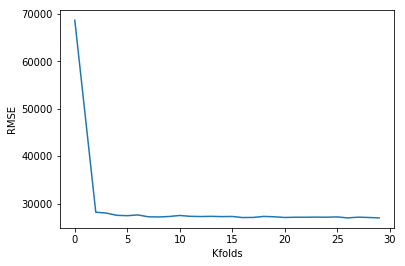

In [31]:
results = []
for i in range(30):
    result = train_and_test(filtered_df, k=i)
    results.append(result)
    
x = [i for i in range(30)]
y = results 
plt.plot(x, y)
plt.xlabel('Kfolds')
plt.ylabel('RMSE')

Cross validation is useful for evaluating the model performance. We can see the average RMSE goes down as we increase the number of folds. This makes sense as the RMSE shown on the graph above is an average of the cross validation tests. A larger K means we have less bias towards overestimating the model's true error. As a trade off, this requires a lot more computation time.